In [4]:
import numpy as np
import networkx as nx
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [5]:
# Helper functions

def create_color_map():
  # Define the colors for the colormap (from blue to orange)
  colors = ["#002049", "#FFA500"]  # Blue to Orange

  # Create a colormap
  return mcolors.LinearSegmentedColormap.from_list("blue_orange_cmap", colors)

def set_default_node_options():
  return {
    'node_color': '#4986e8',
    'node_size': 1000,
    'edgecolors': 'black',
    'linewidths': 2,
  }

def set_default_node_labels():
  return {
    'font_size': 10,
    'font_color': '#ffffff',
    'font_weight': 'bold',
  }

def set_default_edge_options():
  return {
    'edge_color': '#4986e8',
    'width': 2.5,
    'alpha': 0.7,
  }

def set_default_edge_labels(edge_labels):
  return {
    'edge_labels': edge_labels,
    'connectionstyle': 'arc3, rad=0.3',
    'font_size': 12,
    'font_color': 'orange',
    'bbox': {'alpha': 1, 'color': 'white'},
  }

def set_options_for_centrality(G, values, node_options):

  # Converts iterable centrality values into a NumPy array
  cent = np.fromiter(values, float)

  # Normalize and scale centrality values for node sizes
  sizes = cent / np.max(cent) * 1200

  # Create a normalized range of centrality values for color mapping
  normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())

  # Create a colormap
  colormap = create_color_map()

  # Map normalized data values to colors using the specified colormap.
  scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)

  # Associates the centrality values to this map and enable the color bar
  scalarmappaple.set_array(cent)

  # Add a color bar to the plot
  plt.colorbar(scalarmappaple, ax=plt.gca())

  # Enrich node options
  node_options["node_size"] = sizes
  node_options["node_color"] = sizes
  node_options["cmap"] = colormap

  return node_options


In [6]:
# Draw function
def draw_graph(G, pos, node_options=None, edge_options=None, node_labels=None, edge_labels=None):

  # Draw nodes
  if not node_options:
    node_options = set_default_node_options()
  nx.draw_networkx_nodes(G, pos, **node_options)

  # Draw node labels
  if not node_labels:
    node_labels = set_default_node_labels()
  nx.draw_networkx_labels(G, pos, **node_labels)

  # Draw edges
  if not edge_options:
    edge_options = set_default_edge_options()
  nx.draw_networkx_edges(G, pos, **edge_options)

  # Draw edge labels
  if edge_labels:
    nx.draw_networkx_edge_labels(G, pos, **edge_labels)

  # Show the graph
  plt.axis('off')
  plt.gca().set_aspect('equal')
  plt.show()

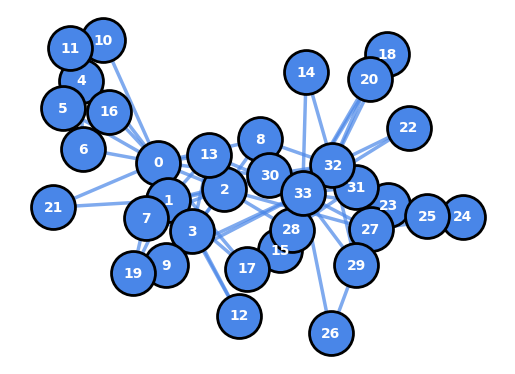

In [7]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G, iterations=10, seed=20000)
draw_graph(G, pos)

### Node-Level Features

#### Node Degree

Node degree refers to the number of edges connected to a node. In a social network, for instance, users’ node degrees correspond to the number of connections they have on the platform. A user with a high node degree could be considered more socially active within the network, similar to a social media influencer with many followers.

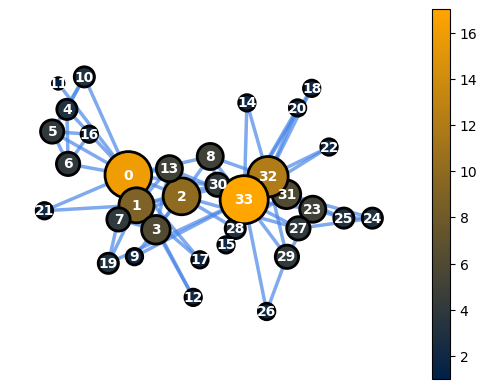

In [8]:
dg = dict(G.degree())
node_options = set_options_for_centrality(G, dg.values(), set_default_node_options())
draw_graph(G, pos, node_options=node_options)

In [9]:
num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = 0
avg_degree = round(2 * num_edges / num_nodes)

print("Num edges:", num_edges, "Num nodes:", num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Num edges: 78 Num nodes: 34
Average degree of karate club network is 5


#### Node Degree Centrality

Node degree centrality measures the importance of a node in a network based on its number of connections. While node degree counts the number of connections, node degree centrality normalizes this value by the total number of possible connections in the network. This normalization allows for more meaningful comparisons between nodes in networks of different sizes.

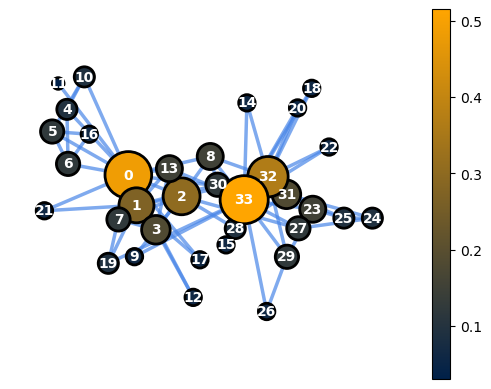

In [10]:
dc = nx.degree_centrality(G)
node_options = set_options_for_centrality(G, dc.values(), set_default_node_options())
draw_graph(G, pos, node_options=node_options)

#### Eigenvector Centrality

Eigenvector centrality measures the influence of a node in a network. It assigns scores to all nodes, considering that connections to high-scoring nodes contribute more than equal connections to low-scoring nodes.

This measure is particularly useful in understanding influence and information flow in complex networks, such as citation or collaboration networks. In this context, eigenvector centrality could help identify key influencers and seminal works in a field, even if they do not have the highest raw citation counts.

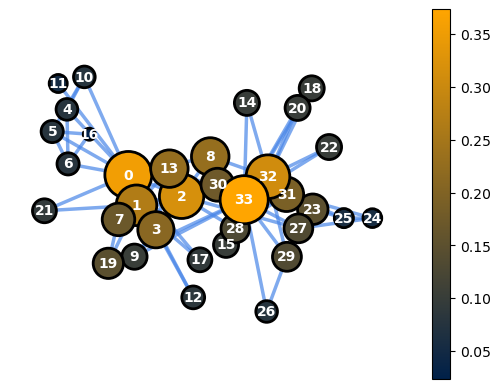

In [11]:
ec = nx.eigenvector_centrality(G)
node_options = set_options_for_centrality(G, ec.values(), set_default_node_options())
draw_graph(G, pos, node_options=node_options)

#### Betweenness Centrality

Betweenness centrality quantifies how often a node acts as a bridge along the shortest path between two other nodes. In other words, a node has high betweenness centrality if it frequently lies on the shortest paths connecting other pairs of nodes.

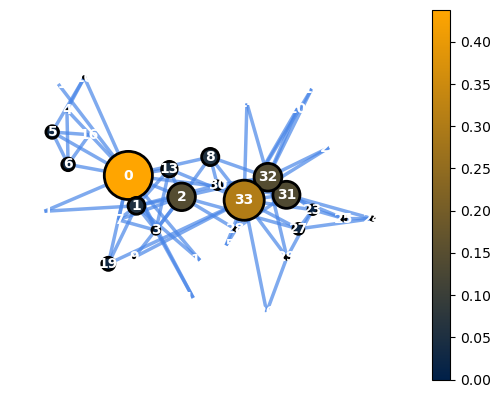

In [12]:
bc = nx.betweenness_centrality(G)
node_options = set_options_for_centrality(G, bc.values(), set_default_node_options())
draw_graph(G, pos, node_options=node_options)

#### Closeness Centrality

Closeness centrality evaluates how close a node is to all other nodes in the network. A node with high closeness centrality can quickly reach other nodes in the network with fewer hops.

In this context, closeness centrality can be crucial in understanding the efficiency and structure of transportation networks, helping city planners optimize routes and identify key hubs.

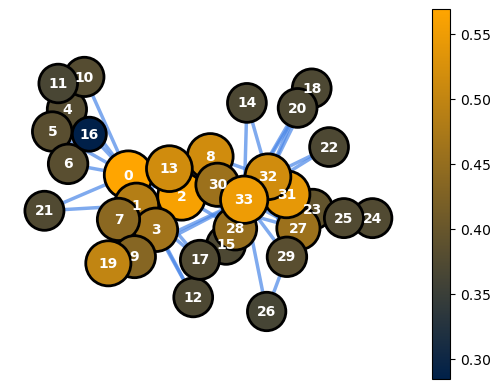

In [13]:
ce = nx.closeness_centrality(G)
node_options = set_options_for_centrality(G, ce.values(), set_default_node_options())
draw_graph(G, pos, node_options=node_options)

#### Clustering Coefficient

The clustering coefficient quantifies the degree to which nodes in a graph tend to cluster together. It reflects the likelihood that two neighbors of a node are also neighbors of each other.

In this context, the clustering coefficient can reveal different local network structures in biological systems, even when nodes representing proteins have the same number of connections.

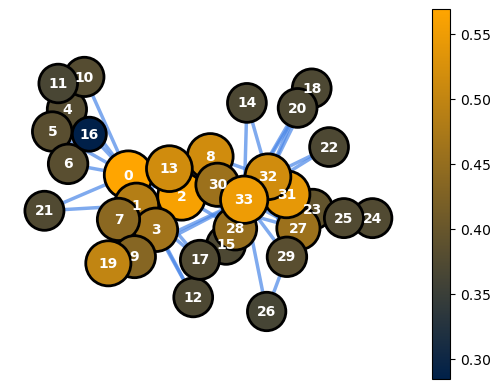

In [14]:
ce = nx.closeness_centrality(G)
node_options = set_options_for_centrality(G, ce.values(), set_default_node_options())
draw_graph(G, pos, node_options=node_options)

### Compare Centrality Values

In [16]:
!pip install dataframe-image
!apt install firefox firefox-geckodriver
!pip install dataframe_image selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 42.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.7/397.7 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 37.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.8/113.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.6 MB/s eta 0:00:00
Unable to locate an executable at "/Library/Java/JavaVirtualMachines/jdk1.8.0_131.jdk/Contents/Home/bin/apt" (-1)
  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 39.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 13.7 MB/s eta 0:00:00
Usin

In [17]:
import pandas as pd
import dataframe_image as dfi

In [18]:
# Create a list with all the centrality values
data = [dc, ec, bc, ce]
indices = ['Degree Centrality', 'Eigenvector Centrality', 'Betweenness Centrality', 'Closeness Centrality']
df = pd.DataFrame(data, index=indices).T
df_styled = df.style.background_gradient(cmap=create_color_map())
df_styled

,Degree Centrality,Eigenvector Centrality,Betweenness Centrality,Closeness Centrality
0,0.484848,0.355483,0.437635,0.568966
1,0.272727,0.265954,0.053937,0.485294
2,0.303030,0.317189,0.143657,0.559322
3,0.181818,0.211174,0.011909,0.464789
4,0.090909,0.075966,0.000631,0.379310
5,0.121212,0.079481,0.029987,0.383721
6,0.121212,0.079481,0.029987,0.383721
7,0.121212,0.170955,0.000000,0.440000
8,0.151515,0.227405,0.055927,0.515625
9,0.060606,0.102675,0.000848,0.434211


In [19]:
df_styled.export_png('df_styled.png', table_conversion='selenium')

### Edge-level Features

#### Distance-based Features

Distance-based features in graph analysis measure the proximity or distance between pairs of nodes in a network. To grasp the key idea behind these features, let’s consider a global airline network where airports are nodes and flight routes are edges.

Distance-based features are essential for contexts such as airline companies, which make decisions about route planning, airport development, and improving the overall efficiency of the air transportation network.

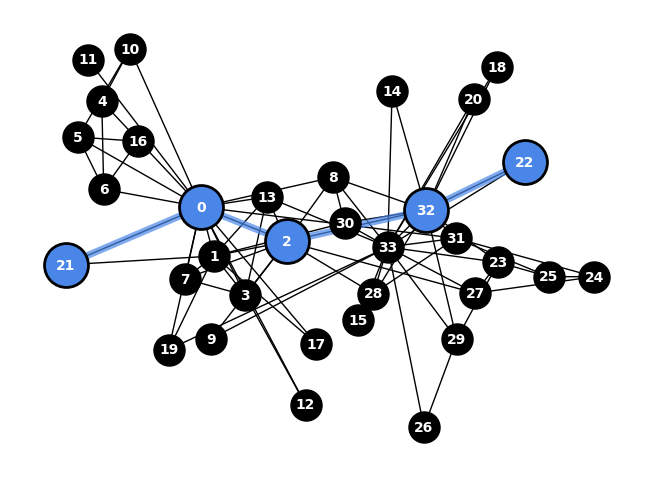

In [20]:
# Identify the shortest path
path = nx.shortest_path(G, source=21, target=22)
path_edges = list(zip(path,path[1:]))
node_options = set_default_node_options()

# Draw and highlight nodes and edges
nx.draw(G, pos, node_color='black', node_size=500)

node_options = {
  'nodelist': path,
  'node_color': '#4986e8',
  'node_size': 1000,
  'edgecolors': 'black',
  'linewidths': 2,
}

edge_options = {
  'edgelist': path_edges,
  'edge_color': '#4986e8',
  'width': 5,
  'alpha': 0.7,
}

draw_graph(G, pos, node_options=node_options, edge_options=edge_options)

#### Local Neighborhood Overlap

Local neighborhood overlap measures how much two nodes in a graph share common neighbors. In other words, it quantifies the similarity between two nodes by calculating the intersection of their neighboring nodes.

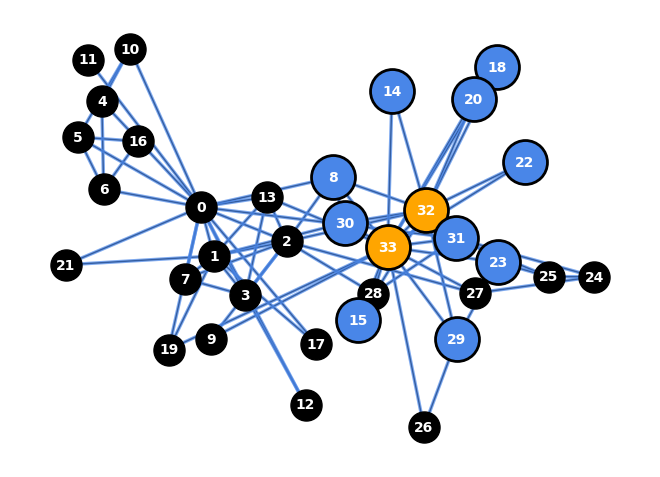

In [21]:
# Identify common local neighbors
loc_neigh = sorted(nx.common_neighbors(G, 32, 33))

# Draw and highlight selected nodes
nx.draw(G, pos, node_color='k', node_size=500)

selected_options = {
  'nodelist': [32, 33],
  'node_color': 'orange',
  'node_size': 1000,
  'edgecolors': 'black',
  'linewidths': 2,
}

nx.draw_networkx_nodes(G, pos, **selected_options)

# Draw and highlight neighbors
node_options = {
  'nodelist': loc_neigh,
  'node_color': '#4986e8',
  'node_size': 1000,
  'edgecolors': 'black',
  'linewidths': 2,
}

draw_graph(G, pos, node_options=node_options)

#### Global Neighborhood Overlap

Global neighborhood overlap measures the similarity between the extended neighborhoods of two nodes in a graph. It calculates the proportion of common neighbors within a certain distance (typically 2 or more hops) relative to the total distinct neighbors within that distance.

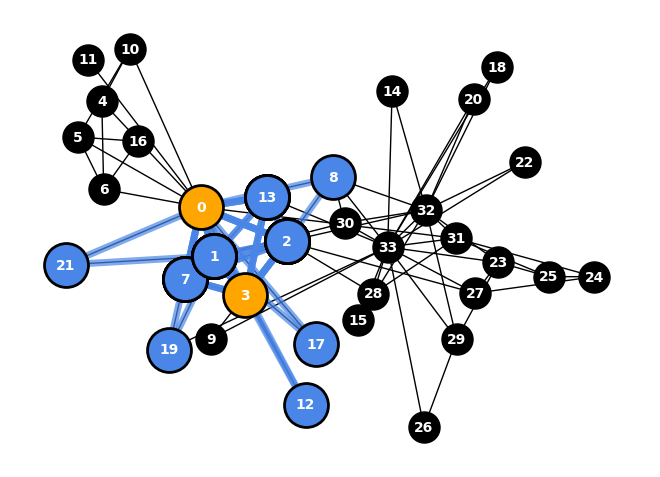

In [22]:
# Detect local neihborhood overlap
edges = []
nodes = []
paths = nx.all_simple_paths(G, source=0, target=3, cutoff=3)

for p in paths:
  nodes.append(p)
  edge = list(zip(p, p[1:]))
  edges.append(edge)

# Flat lists for nodes and edges
nodes = [
    x
    for xs in nodes
    for x in xs
]

edges = [
    x
    for xs in edges
    for x in xs
]

# Draw basic elements of the graph
nx.draw(G, pos, node_color='k', node_size=500)

# Draw source and target nodes
selected_options = {
  'nodelist': [0, 3],
  'node_color': 'orange',
  'node_size': 1000,
  'edgecolors': 'black',
  'linewidths': 2,
}

nx.draw_networkx_nodes(G, pos, **selected_options)

# Draw global neighbor nodes and the related connections with source and target
node_options = {
  'nodelist': [n for n in nodes if n not in [0, 3]],
  'node_color': '#4986e8',
  'node_size': 1000,
  'edgecolors': 'black',
  'linewidths': 2,
}

edge_options = {
  'edgelist': edges,
  'edge_color': '#4986e8',
  'width': 5,
  'alpha': 0.7,
}

draw_graph(G, pos, node_options=node_options, edge_options=edge_options)

### Graph-Level Features

#### Weisfeiler-Leman Features

Weisfeiler-Leman (WL) features are derived from the WL algorithm, an iterative method for testing graph isomorphism. These features capture structural information about graphs by iteratively updating node labels based on the labels of neighboring nodes.

WL features are particularly useful in graph analysis tasks, such as graph classification, as they provide a way to encode the graph structure into feature vectors that can be used by machine learning algorithms.

In [23]:
import networkx as nx
import numpy as np
from networkx.algorithms import isomorphism

# Get the adjacency matrix of G1
adj_matrix = nx.to_numpy_array(G)

# Create a random permutation of the nodes
n = G.number_of_nodes()
np.random.seed(42)
permutation = np.random.permutation(n)

# Create the permutation matrix
P = np.zeros((n, n))
for i in range(n):
    P[i, permutation[i]] = 1

# Apply the permutation to the adjacency matrix: P*A*P^T
permuted_adj_matrix = P @ adj_matrix @ P.T

# Create the permuted graph from the permuted adjacency matrix
G_perm = nx.from_numpy_array(permuted_adj_matrix)

# Check if the graphs are isomorphic
iso_check = isomorphism.is_isomorphic(G, G_perm)
print(f"Are G and G_perm isomorphic? {iso_check}")

# Compute the Weisfeiler-Lehman graph hashes for both graphs
hash_G = nx.weisfeiler_lehman_graph_hash(G)
hash_G_perm = nx.weisfeiler_lehman_graph_hash(G_perm)

# Print the hashes
print(f"Weisfeiler-Lehman Graph Hash of G: {hash_G}")
print(f"Weisfeiler-Lehman Graph Hash of G_perm: {hash_G_perm}")

# Compare the hashes
are_hashes_equal = hash_G == hash_G_perm
print(f"Are the WL graph hashes of G and G_perm equal? {are_hashes_equal}")

Are G and G_perm isomorphic? True
Weisfeiler-Lehman Graph Hash of G: c7184009df3be2e402cfcb318efaa4b3
Weisfeiler-Lehman Graph Hash of G_perm: c7184009df3be2e402cfcb318efaa4b3
Are the WL graph hashes of G and G_perm equal? True


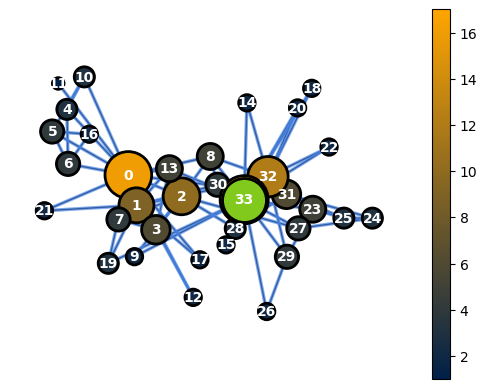

In [24]:
# Default node features
node_options = set_options_for_centrality(G, dg.values(), set_default_node_options())

nx.draw(G, pos, **node_options)

# Emphasize node 33 to check how it is permuted
node_options = {
  'nodelist': [33],
  'node_color': '#82c91e',
  'node_size': 1000,
  'edgecolors': 'black',
  'linewidths': 2,
}

node_labels = {
  'font_size': 10,
  'font_color': '#ffffff',
  'font_weight': 'bold',
}

draw_graph(G, pos, node_options=node_options, node_labels=node_labels)

In [25]:
# Get the node corresponding to 33 after the permutation
node_id = 33

# Find the index of the value 33
index = np.where(permutation == 33)[0][0]

print(index)

29


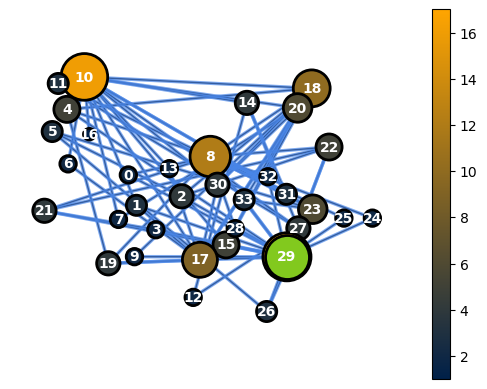

In [26]:
# Compute node degree of the permuted graph
dg_perm = dict(G_perm.degree())

node_options = set_options_for_centrality(G_perm, dg_perm.values(), set_default_node_options())

nx.draw(G_perm, pos, **node_options)

# Emphasize node 29, which is the result of the permutation
node_options = {
  'nodelist': [29],
  'node_color': '#82c91e',
  'node_size': 1000,
  'edgecolors': 'black',
  'linewidths': 2,
}

node_labels = {
  'font_size': 10,
  'font_color': '#ffffff',
  'font_weight': 'bold',
}

draw_graph(G_perm, pos, node_options=node_options, node_labels=node_labels)

In [27]:
assert dg[33] == dg_perm[29]

#### Graphlets

Graphlets are small-sized subgraphs detected within a larger graph representing local connectivity patterns. Graphlets can be considered both node-based and graph-based features:

* As node-based features, graphlets can be used to characterize the local neighborhood structure around individual nodes. By examining the graphlets a node participates in, we can gain insights into its local connectivity patterns within the network.
* As graph-based features, graphlets can also describe a graph’s overall structure. By counting the occurrences of different graphlets within the entire graph, we can obtain a fingerprint of the graph’s topology.

Considering this twofold perspective, graphlets are helpful for several reasons:

* Classification tasks: graphlet-based features can be extracted from each node’s neighborhood and used as input for machine learning models to predict node labels or classes.
* Network comparison: Similarity measures based on graphlet frequencies can be used to compare or group different networks.
* Structural analysis: graphlets capture specific arrangements of nodes that contribute to forming local grouping patterns, providing insights into the network’s structure.

In [34]:
%%capture
!apt install libgraphviz-dev

/Users/keithlowton/anaconda3/envs/Network_analysis/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


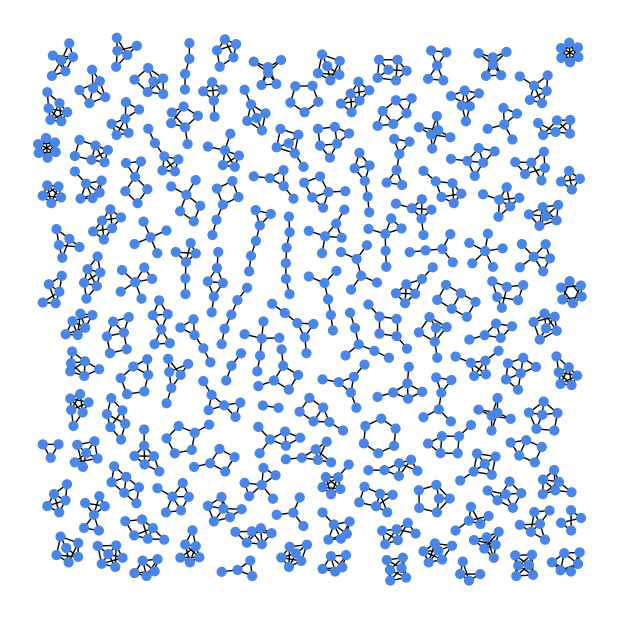

In [35]:
import random
import pygraphviz

GraphMatcher = nx.isomorphism.vf2userfunc.GraphMatcher

def atlas6():
    Atlas = nx.graph_atlas_g()[3:209]  # 0, 1, 2 => no edges. 208 is last 6 node graph
    U = nx.Graph()  # graph for union of all graphs in atlas
    for G in Atlas:
        # check if connected
        if nx.number_connected_components(G) == 1:
            # check if isomorphic to a previous graph
            if not GraphMatcher(U, G).subgraph_is_isomorphic():
                U = nx.disjoint_union(U, G)
    return U

G_atlas = atlas6()

plt.figure(1, figsize=(6, 6))

# layout graphs with positions using graphviz neato
pos = nx.nx_agraph.graphviz_layout(G_atlas, prog="neato")

# color nodes the same in each connected subgraph
C = (G_atlas.subgraph(c) for c in nx.connected_components(G_atlas))


for g in C:
    c = ['#4986e8'] * nx.number_of_nodes(g)  # random color...
    nx.draw(g, pos=pos, node_size=40, node_color=c, vmin=0.0, vmax=1.0, with_labels=False)
plt.show()